# 탐색적 데이터분석 (Exploratory Data Analysis, EDA)

## 개념정의
* 데이터셋을 탐색하고 이해하기 위해 수행되는 분석 과정
* 대략적인 간단한 분석절차를 기본으로 동적으로 데이터를 학습하며 데이터분석을 심화시키는 기법

## 주요절차

### 1. 초기데이터 분석

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형, 결측치, 이상치확인)

### 2. 데이터 정제

#### 2.1. 원본데이터로에서 분석가능한 형태의 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

### 4. 탐색적연구

#### Step1] 가설: 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다.
* 예) 현재 와인데이터셋은 두 개의 서로 다른 품종의 데이터가 혼합되어 있을 것이다.

#### Step2] 가설증명: 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다. 
* 예) 품질관련 데이터 셋의 히스토그램 분석 후, 데이터 셋을 분리하여 서로 다른 정규분포가 나오는 그래프로 검증

#### Step3] 가설결론: 해당 가설에 대한 결론을 내린다.

#### Step4] 탐색적연구 반복: 시간 일정이 허락하는 범위내에서 Step1~Step3를 반복한다.

#### Step5] 최종결론: 지금까지 진행했던 모든 탐색적연구의 결과를 반영하여 최종 결론을 내린다.

# 탐색적분석 적용 실습 템플릿

## 데이터 수집

### 모듈 import

####  데이터 불러오기(read, 이름: 2021년 ~ 2022년 자동차 단속 현황)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import seaborn as sns
from matplotlib import font_manager,rc
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [2]:
data=pd.read_csv('data.csv', encoding='cp949')

## 1. 초기데이터 분석

### 1-1. 데이터딕셔너리 확인

In [3]:
# 각 열의 의미, 데b이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요

### 1-2. 데이터 기초정보 확인

In [4]:
# 사이즈, 데이터형, 결측치, 중복값, 이상치등을 확인하세요

####  필요없는 열 삭제  
* 1. 단속년도
* 2. 단속장소
* 3. 단속 구분 
* 4. 자치단체 4개의 열 삭제

## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [5]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환등)

In [52]:
#데이터 필요한 부분만 발최
data1=data.drop(['단속년도','단속장소','단속구분','자치단체'], axis=1)
data1.rename(columns={'단속방법 ':'단속방법'}, inplace=True)

In [53]:
data1

,단속일시,차종,차명,단속방법
0,2021-01-01 7:08,01 승용차,아반떼(AVANTE),고정형CCTV
1,2021-01-01 10:24,03 화물차(4t 이하),그랜드스타렉스(GRAND STAREX),고정형CCTV
2,2021-01-01 13:17,01 승용차,K5,고정형CCTV
3,2021-01-01 16:17,01 승용차,쏘나타 (SONATA),고정형CCTV
4,2021-01-01 18:51,01 승용차,카니발,고정형CCTV
...,...,...,...,...
68846,2022-11-15 10:29,01 승용차,SM6,생활불편신고(국민신문고등)
68847,2022-11-14 17:44,01 승용차,E300,생활불편신고(국민신문고등)
68848,2022-11-11 17:16,02 승합차,그레이스,생활불편신고(국민신문고등)
68849,2022-11-15 7:40,03 화물차(4t 이하),봉고Ⅲ 1톤,생활불편신고(국민신문고등)


### 2-2. 데이터 클리닝

In [54]:
# 이상치, 결측치, 중복값 처리등의 작업을 진행하세요

#### 데이터의 통계를 내기위해화 groupby를 통해 수치

In [55]:
group_data=data1.groupby('단속일시').value_counts().to_frame()
# 시간상 다양한 groupby를 하지 못함.

In [56]:
group_data1=data1.groupby('차종')['차명'].value_counts().to_frame()
# 사용할수 있지만 사용하지 않은 차종별 차명별 단속수

In [57]:
group_data1

count
차종     차명                  
01 승용차 쏘나타(SONATA)     6228
       K5              3551
       그랜저(GRANDEUR)   3220
       모닝              2742
       아반떼(AVANTE)     2524
...                     ...
08 이륜차 LTS125             1
       CA110B             1
       CB115              1
       CB115D             1
       YZF-R1             1

[2326 rows x 1 columns]

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터딕셔너리 재확인

In [58]:
# 1-2 작업을 다시 해보세요.

### 3.2 기초통계 정보 확인

In [59]:
# 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등의 정보를 파악해보세요

In [60]:
group_data

,,,,count
단속일시,차종,차명,단속방법,
2021-01-01 10:24,03 화물차(4t 이하),그랜드스타렉스(GRAND STAREX),고정형CCTV,1
2021-01-01 13:17,01 승용차,K5,고정형CCTV,1
2021-01-01 16:17,01 승용차,쏘나타 (SONATA),고정형CCTV,1
2021-01-01 18:51,01 승용차,카니발,고정형CCTV,1
2021-01-01 21:46,01 승용차,그랜저(GRANDEUR),고정형CCTV,1
...,...,...,...,...
2022-11-30 8:42,01 승용차,QM6,고정형CCTV,1
2022-11-30 8:43,03 화물차(4t 이하),봉고Ⅲ 플러스냉장차,고정형CCTV,1
2022-11-30 8:45,01 승용차,캐딜락 XT5,고정형CCTV,1


#### 데이터를 활용하기위해 Datetime으로 형변환 및 인덱스 조정

In [61]:
#인덱스 초기화
group_data.reset_index(inplace=True)

In [62]:
group_data

,단속일시,차종,차명,단속방법,count
0,2021-01-01 10:24,03 화물차(4t 이하),그랜드스타렉스(GRAND STAREX),고정형CCTV,1
1,2021-01-01 13:17,01 승용차,K5,고정형CCTV,1
2,2021-01-01 16:17,01 승용차,쏘나타 (SONATA),고정형CCTV,1
3,2021-01-01 18:51,01 승용차,카니발,고정형CCTV,1
4,2021-01-01 21:46,01 승용차,그랜저(GRANDEUR),고정형CCTV,1
...,...,...,...,...,...
68110,2022-11-30 8:42,01 승용차,QM6,고정형CCTV,1
68111,2022-11-30 8:43,03 화물차(4t 이하),봉고Ⅲ 플러스냉장차,고정형CCTV,1
68112,2022-11-30 8:45,01 승용차,캐딜락 XT5,고정형CCTV,1
68113,2022-11-30 8:45,01 승용차,팰리세이드(PALISADE),고정형CCTV,1


#### 필요없는 열 날리기(현재)

In [63]:
group_data.drop(['차명','차종','차명','단속방법'],axis=1,inplace=True)

In [64]:
group_data

,단속일시,count
0,2021-01-01 10:24,1
1,2021-01-01 13:17,1
2,2021-01-01 16:17,1
3,2021-01-01 18:51,1
4,2021-01-01 21:46,1
...,...,...
68110,2022-11-30 8:42,1
68111,2022-11-30 8:43,1
68112,2022-11-30 8:45,1
68113,2022-11-30 8:45,1


In [65]:
# 날짜 데이터를 활용하기위해 to_datetime을 사용함
group_data['단속일시']=pd.to_datetime(group_data['단속일시'])

In [66]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68115 entries, 0 to 68114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   단속일시    68115 non-null  datetime64[ns]
 1   count   68115 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 MB


In [67]:
# 그리고 resample을 활용하기위해 날짜 데이터를 인덱스로 변환
group_data.set_index('단속일시', inplace=True)

### 3.3 시각화를 통한 데이터이해 심화

#### 3.3.1 단일 열

In [68]:
# 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요. (막대차트, 파이차트, 라인차트, 히스토그램등..)

#### 주별 카운트

In [69]:
weekly=group_data.resample('W').sum()
weekly

,count
단속일시,
2021-01-03,27
2021-01-10,454
2021-01-17,652
2021-01-24,506
2021-01-31,682
...,...
2022-11-06,754
2022-11-13,651
2022-11-20,727


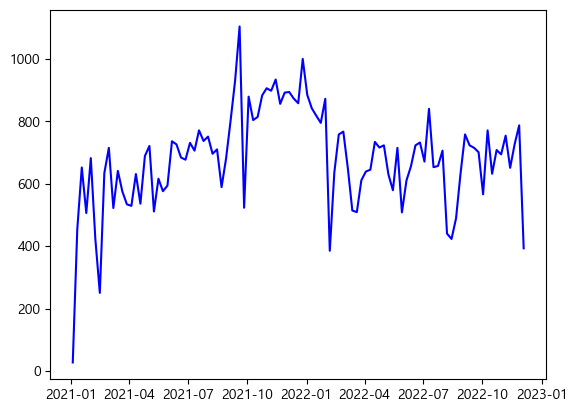

In [70]:
plt.plot(weekly, 'b')

#### 월별 카운트

In [71]:
monthly=group_data.resample('M').sum()
monthly

,count
단속일시,
2021-01-31,2321
2021-02-28,2023
2021-03-31,2542
2021-04-30,2817
2021-05-31,2464
2021-06-30,3080
2021-07-31,3273
2021-08-31,2976
2021-09-30,3744


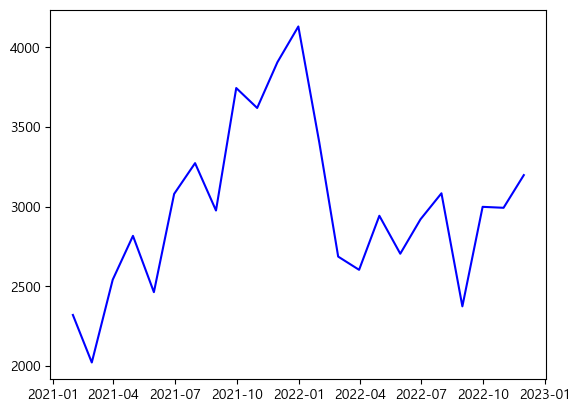

In [72]:
plt.plot(monthly, 'b')

#### 년별 카운트

In [73]:
year=group_data.resample('Y').sum()
year

,count
단속일시,
2021-12-31,36895
2022-12-31,31912


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([31912. , 32410.3, 32908.6, 33406.9, 33905.2, 34403.5, 34901.8,
        35400.1, 35898.4, 36396.7, 36895. ]),
 <BarContainer object of 10 artists>)

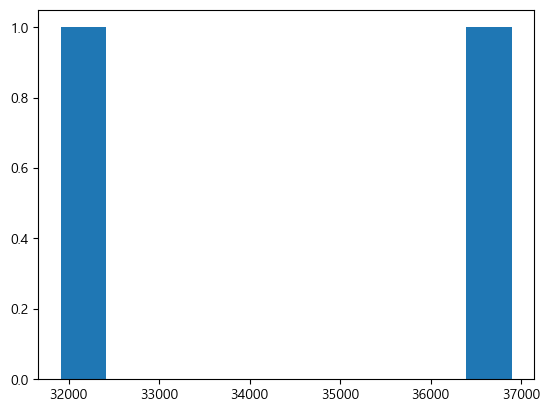

In [74]:
plt.hist(year)

#### 공통된 시간별 단속 조회

In [88]:
hours_data=group_data

In [89]:
hours_data.reset_index(inplace=True)

In [90]:
hours_data

,단속일시,count
0,2023-07-06 10:24:00,1
1,2023-07-06 13:17:00,1
2,2023-07-06 16:17:00,1
3,2023-07-06 18:51:00,1
4,2023-07-06 21:46:00,1
...,...,...
68110,2023-07-06 08:42:00,1
68111,2023-07-06 08:43:00,1
68112,2023-07-06 08:45:00,1
68113,2023-07-06 08:45:00,1


#### 시간대별로 나누기위해 년,월,일 동기화

In [91]:
hours_data['단속일시']=hours_data['단속일시'].astype(str)

In [92]:
hours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68115 entries, 0 to 68114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단속일시    68115 non-null  object
 1   count   68115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [93]:
hours_data['단속일시']=hours_data['단속일시'].apply(lambda x:x[11:])
hours_data

,단속일시,count
0,10:24:00,1
1,13:17:00,1
2,16:17:00,1
3,18:51:00,1
4,21:46:00,1
...,...,...
68110,08:42:00,1
68111,08:43:00,1
68112,08:45:00,1
68113,08:45:00,1


년 월 일이 없기때문에 현재 날짜로 통합

In [94]:
hours_data['단속일시'] = pd.to_datetime(hours_data['단속일시'])

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_4488\780441520.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hours_data['단속일시'] = pd.to_datetime(hours_data['단속일시'])


In [95]:
hours_data.set_index('단속일시', inplace=True)
hours_data

,count
단속일시,
2023-07-06 10:24:00,1
2023-07-06 13:17:00,1
2023-07-06 16:17:00,1
2023-07-06 18:51:00,1
2023-07-06 21:46:00,1
...,...
2023-07-06 08:42:00,1
2023-07-06 08:43:00,1
2023-07-06 08:45:00,1


#### 시간대별 단속 데이터

In [96]:
hours_df=hours_data.resample('H').sum()

In [97]:
hours_df

,count
단속일시,
2023-07-06 00:00:00,817
2023-07-06 01:00:00,1
2023-07-06 02:00:00,1
2023-07-06 03:00:00,0
2023-07-06 04:00:00,0
2023-07-06 05:00:00,137
2023-07-06 06:00:00,239
2023-07-06 07:00:00,7497
2023-07-06 08:00:00,7593


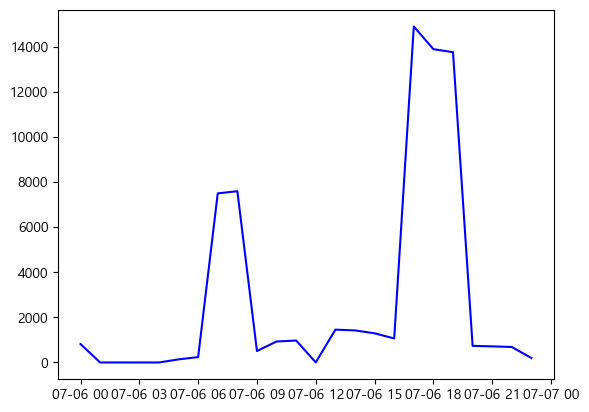

In [98]:
plt.plot(hours_df, 'b')

In [99]:
T=hours_data.resample('10T').sum()

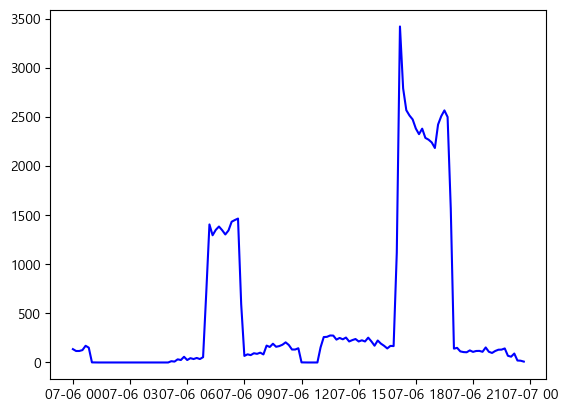

In [101]:
plt.plot(T, 'b')

In [102]:
hh=hours_data.resample('2H').sum()

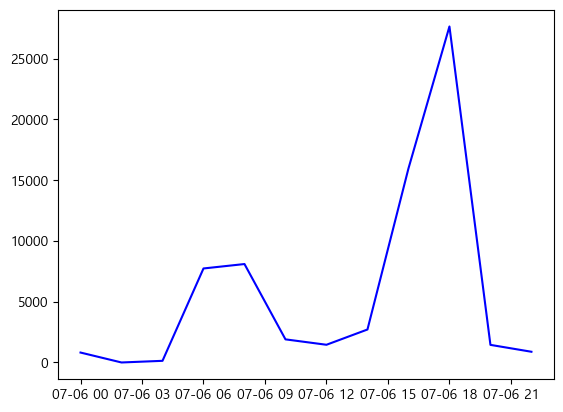

In [104]:
plt.plot(hh, 'b')

#### 3.3.1 복수 열

In [9]:
# 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)해 보세요

## 4. 탐색적 연구

### Step1] 가설: 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다.

* 1. 시간에따라 특정 단속이 심해진다 //솔향

* 2. 특수한 차종에 따라 단속율이 다르다. //하은

* 3. 단속을 피할수 있는 시간이 있다. //성보 



### Step2] 가설증명: 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다. 

In [11]:
가설1.
월초 행사에 의해 사고가 많아질것을 우려해, 단속이 강화 될것이라고 추측.

가설2.
출퇴근 시간에 따라서 출근복잡도를 해결하기 위해 단속을 강화 할것이라고 추측.

가설3.
특정 차종(양카)가 단속에 많이 걸릴것으로 생각함.


# 가설 증명하는 코드를 간단한 통계지표나 시각화를 통해서 작성해 보세요.
# 필요하다면 기존 데이터를 재구조화(Groupby, Pivot)을 해보세요.

In [110]:
data2=data1.drop(['단속일시','차종','단속방법'], axis=1)

In [111]:
group_data3=data2.groupby('차명').value_counts().to_frame()

In [121]:
group_data3.sort_values('count',ascending=False, inplace=True)
group_data3

,count
차명,
쏘나타(SONATA),6228
K5,3551
그랜저(GRANDEUR),3220
모닝,2742
아반떼(AVANTE),2524
...,...
LEXUS RX350,1
LEGEND,1
Kuga 2.0 AWD,1


In [124]:
group_data3[:10]

,count
차명,
쏘나타(SONATA),6228
K5,3551
그랜저(GRANDEUR),3220
모닝,2742
아반떼(AVANTE),2524
싼타페(SANTAFE),2263
포터Ⅱ (PORTERⅡ),1883
쏘렌토,1751
스포티지,1717


### Step3] 가설결론: 해당 가설에 대한 결론을 내린다.

In [12]:
# 가설 검증한 내용을 여기에 마크다운형식으로 정리하세요



### Step4] 탐색적연구 반복: 시간 일정이 허락하는 범위내에서 Step1~Step3를 반복한다.

### Step5] 최종결론: 지금까지 진행했던 모든 탐색적연구의 결과를 반영하여 최종 결론을 내린다.

In [13]:
# 아래 최종 결론에 각 가설 별 학습내용과 개별 가설의 내용에서 도출된 최종 Insight를 정리하세요

## 5. 최종 결론

가설과 동일한 그래프를 확인할 수 있었음

### 가설 1 결론: 

### 가설 1 결론: 

### 최종 결론 (새로운 insight)